<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h2>Movable MSEplot probe in a ZIDV-extracted data cube</h2>
<h3>Drilling down into the science of:</h3>

Mapes, Cheedela, Igel, Tsai 2019: The dynamics of water vapor islands over the western equatorial Indian ocean. In preparation

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Steps in the analysis 
1. <a href="#data">Open the .zidv file with xarray</a>
1. <a href="#buildclickmap">Build clickable maps in Holoviews</a>
1. <a href="#clickmap">Movable probe on a CWV backdrop image</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
from IPython.display import HTML,display
from MSEplots import plots as mpt
import metpy.calc as mpcalc
from metpy.units import units as mpunits

<a name="import"></a>
---------
## Open the .zidv dataset
#### Download or chose the file from here 
[Igel long-lived "water vapor island" cases -- Repository](http://weather.rsmas.miami.edu/repository/entry/show?entryid=cea25c8d-b05a-4d47-aa2b-bdb06c5453b2)

In [48]:
zidvfile='http://weather.rsmas.miami.edu/repository/entry/get/Igel_WEIO_case_2015-12-16.zidv?entryid=015b6a8b-00d4-4eec-8c00-55d1c95163b3'

#or local file path 'path/Igel_WEIO_case_2015-12-16.zidv'

In [4]:
# a small utility to open the local or remote dataset dataset 
from os.path import isfile, join
from zipfile import ZipFile
import xarray
def from_zidv(fileorurl=None,outdir=None):
    """Loading data from IDV zip file '.zidv' as xarray Dataset
    fileorurl can be a local .zidv file or a remote url.
    Optionally, outdir can be specified where the file is unzipped"""
    if fileorurl.startswith('http'):
        zfile = urlopen(fileorurl)
        zfile = BytesIO(zfile.read())
    elif isfile(fileorurl):
        zfile=fileorurl
    else:
        return 'Unknown File or Url'
    das=dict()
    with ZipFile(zfile) as zip_file:
        for contained_file in zip_file.namelist():
            if str(contained_file).startswith('data'):
                try:
                    das.update({contained_file:xarray.open_dataset(zip_file.extract(contained_file,outdir))})
                except Exception as err:
                    print('Skipping file '+str(contained_file)+' because of error '+err)
    return das
xarray.from_zidv=from_zidv

In [49]:
datasets_in_zidv=xr.from_zidv(zidvfile)
datasets_in_zidv.keys() #keys of datasets in xidv file

dict_keys(['data_0_MERRA23Ddata', 'data_1_ERAI2D3h@NCAR', 'data_2_MERRA22Dfields', 'data_3_ERAI3DatNCAR-RDA', 'data_4_GridSat-Aggregation'])

#### Load datasets and match times

In [50]:
merra2d=datasets_in_zidv['data_2_MERRA22Dfields']
merra3d=datasets_in_zidv['data_0_MERRA23Ddata']
erai2d=datasets_in_zidv['data_1_ERAI2D3h@NCAR']
erai3d=datasets_in_zidv['data_3_ERAI3DatNCAR-RDA']
#match times of all the datasets to 6h erai3d 
merra2d=merra2d.sel(time=erai3d.time) # match times of both datasets
merra3d=merra3d.sel(time=erai3d.time)

erai2d=erai2d.rename({'time1':'time'})
erai2d=erai2d.sel(time=erai3d.time)


In [7]:
timevals=erai3d.time.values


## Compare TPW of MERRA and ERAI 

#### MERRA 

In [81]:
%%opts QuadMesh (cmap='PuBuGn') [width=600,height=400,colorbar=True,tools=['hover']]
hv.Dataset(merra2d.tqv).to(hv.QuadMesh,kdims=['lon','lat'],dynamic=True).redim.values(tqv=(10,70)) #could remove dynamic option for static embed

:DynamicMap   [time]
   :QuadMesh   [lon,lat]   (tqv)

#### ERAI

In [83]:
%%opts QuadMesh (cmap='PuBuGn') [width=600,height=400,colorbar=True,tools=['hover']]
hv.Dataset(erai2d.Total_column_water_surface).to(hv.QuadMesh,kdims=['lon','lat'],dynamic=True).redim.values(tqv=(10,70))

:DynamicMap   [time]
   :QuadMesh   [lon,lat]   (Total_column_water_surface)

In [65]:
np.warnings.filterwarnings('ignore') # supress lots of error messages from metpy #mostly satvapor pressure cals

<a name="buildclickmap"></a>
---------

## Utilities: make clickable map

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
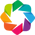

In [63]:
import holoviews as hv
from bokeh.models import OpenURL, TapTool, HoverTool
import ipywidgets as widgets
from holoviews.streams import Selection1D
from functools import partial
hv.notebook_extension('bokeh')

### Make custom function for drawing coastlines

In [11]:
def coastlines(resolution='110m',lon_360=False):
    """ A custom method to plot in cylyndrical equi projection, most useful for
        native projections, geoviews currently supports only Web Mercator in
        bokeh mode.
        
        Other resolutions can be 110m or 50m
        
        lon_360 flag specifies if longitudes are from -180 to 180 (default) or 0 to 360
        TODO: if hv.Polygons is used instead of overlay it is way faster but 
              something is wrong there.
    """
    try:
        import cartopy.io.shapereader as shapereader
        from cartopy.io.shapereader import natural_earth
        import shapefile
        filename = natural_earth(resolution=resolution,category='physical',name='coastline')
    
        sf = shapefile.Reader(filename)
        fields = [x[0] for x in sf.fields][1:]
        records = sf.records()
        shps = [s.points for s in sf.shapes()]
        pls=[]
        for shp in shps:
            lons=[lo for lo,_ in shp]
            lats=[la for _,la in shp]
            if lon_360:
                lats_patch1=[lat for lon,lat in zip(lons,lats) if lon<0]
                lons_patch1=[lon+360.0 for lon in lons if lon<0]
                if any(lons_patch1):
                    pls.append(hv.Path((lons_patch1,lats_patch1)).opts(color='Black'))    
                lats_patch2=[lat if lon>=0 else None for lon,lat in zip(lons,lats)]
                lons_patch2=[lon if lon>=0 else None for lon in lons]
                if any(lons_patch2):
                    pls.append(hv.Path((lons_patch2,lats_patch2)).opts(color='Black'))
            else:
                pls.append(hv.Path((lons,lats)).opts(color='Black'))
        return hv.Overlay(pls)
    except Exception as err:
        print('Overlaying Coastlines not available from holoviews because: {0}'.format(err))

In [12]:
coastline=coastlines(lon_360=False) #this may download shape files on first invocation
                                   #if data longitudes are -180 to 180 then lon_360=False

### Create MSE probe as a widget on map display:

In [34]:
def mse_plot(timelatlon,entrain):
    """A function that will produce matplotlib plot at
       a given time,lat,lon
    """
    time0,time1,lat,lon=timelatlon.split(' ')
    time=' '.join([time0,time1])
    lat=float(lat)
    lon=float(lon)

    if isinstance(time,str):
        time_str=time
    else:
        np.datetime_as_string(time,units='s')
    
    label='Lat {} Lon {} Time {}'.format(format(lat,'.1f'),format(lon,'.1f'),time_str)
    
    merra2_sel = merra3d.sel(time=time,method='nearest').sel(lon=lon,lat=lat,method='nearest')
    
    loadingW.value = "Loading.... "
    
    #filter out nans other wise the plotting/calc routines wont work
    T=merra2_sel.t
    p=merra2_sel.lev[~np.isnan(T)].values*mpunits.millibar 
    rh=merra2_sel.rh[~np.isnan(T)].values

    T=T[~np.isnan(T)].values*mpunits.K

    T=T.to(mpunits.degC)
    qv=mpcalc.mixing_ratio_from_relative_humidity(rh,T,p)
    plts=mpt.msed_plots(np.array(p),np.array(T),np.array(qv),altitude=[],entrain=entrain,title=label)   

    loadingW.value='' #label #txt

In [35]:
# widgets through which interaction happens
times=[' '.join(np.datetime_as_string(tv,unit='s').split('T')) for tv in timevals] #not necessary but gives nicer formatting

entrainW=widgets.Checkbox(value=False,description='Entraining Parcels')
loadingW=widgets.Label('Loading....') # A informative label to show data is still loading
timelatlonW=widgets.Label(str(times[0]+' 0.0 0.0'))

ui = widgets.VBox([timelatlonW,loadingW,entrainW])

out = widgets.interactive_output(mse_plot, {'timelatlon': timelatlonW,'entrain':entrainW})
out.layout.height='650px' 
out.layout.left='10em' #left padding
#display(ui, out) #shows the widget

In [36]:
#A callback that updates mse plot on click
def mseplot_callback(data,index):
    
    if isinstance(index,list):
        time=str(data.data.iloc[index[0]]['time'])
        lat=data.data.iloc[index[0]]['lat']
        lon=data.data.iloc[index[0]]['lon']
        timelatlonW.value=f'{time} {lat} {lon}'

### Create list of events and add additional metadata to the dataset.
#### Mostly useful to open nasa worldview url. This step can be slow depending on the size of dataset 

In [53]:
at_df=merra2d.to_dataframe().reset_index().dropna() #make it pandas dataframe and dropmissing values
at_df['eventdatestr']=at_df.time.apply(lambda x:str(x).split()[0])
at_df['eventdatestr1']=at_df.time.apply(lambda x:str(x+timedelta(days=1)).split()[0])
at_df['eventlonstrE']=at_df.lon.apply(lambda x:str(x+10.0))
at_df['eventlonstrW']=at_df.lon.apply(lambda x:str(x-10.0))
at_df['eventlatstrN']=at_df.lat.apply(lambda x:str(x+7.5))
at_df['eventlatstrS']=at_df.lat.apply(lambda x:str(x-7.5))
at_df['eventtimestr']=at_df.time.apply(str)
at_df['eventlonstr']=at_df.lon.apply(str)
at_df['eventlatstr']=at_df.lat.apply(str)

In [54]:
at_df.head()

lat     lon                time            slp        tqv  \
0 -24.0  29.375 2015-12-16 00:00:00  100877.515625  25.372211   
1 -24.0  29.375 2015-12-16 06:00:00  101060.031250  23.527361   
2 -24.0  29.375 2015-12-16 12:00:00  100769.781250  24.440969   
3 -24.0  29.375 2015-12-16 18:00:00  100849.382812  23.675306   
4 -24.0  29.375 2015-12-17 00:00:00  100921.250000  21.998249   

              reftime eventdatestr eventdatestr1 eventlonstrE eventlonstrW  \
0 2015-12-16 00:00:00   2015-12-16    2015-12-17       39.375       19.375   
1 2015-12-16 06:00:00   2015-12-16    2015-12-17       39.375       19.375   
2 2015-12-16 12:00:00   2015-12-16    2015-12-17       39.375       19.375   
3 2015-12-16 18:00:00   2015-12-16    2015-12-17       39.375       19.375   
4 2015-12-17 00:00:00   2015-12-17    2015-12-18       39.375       19.375   

  eventlatstrN eventlatstrS         eventtimestr eventlonstr eventlatstr  
0        -16.5        -31.5  2015-12-16 00:00:00      29.375       -24.0  
1        -16.5        -31.5  2015-12-16 06:00:00      29.375       -24.0  
2        -16.5        -31.5  2015-12-16 12:00:00      29.375       -24.0  
3        -16.5        -31.5  2015-12-16 18:00:00      29.375       -24.0  
4        -16.5        -31.5  2015-12-17 00:00:00      29.375       -24.0

#### A generic funtion to apply threshold on the data and choose maximum number of points displayed: too many points can clog the browser.

In [56]:
latmin,latmax=float(merra2d.lat.min().values),float(merra2d.lat.max().values)
lonmin,lonmax=float(merra2d.lon.min().values),float(merra2d.lon.max().values)
def threshold_TPW(threshold=50,max_points=100):
    """ Given a threshold of TPW this function return plot corresponding to locations of first 
        max_points values of TPW_TEND in an increasingly sorted array"""
    
    events=at_df[at_df['tqv']>threshold].sort_values('tqv',ascending=False)[0:max_points]
    
    hvd=hv.Dataset(events,kdims=['lon','lat'])
    
    vdims=['tqv','slp','eventtimestr','eventlatstr','eventlonstr',
       'eventdatestr','eventdatestr1','eventlonstrW','eventlonstrE','eventlatstrN','eventlatstrS']
    pts=hvd.to(hv.Points,kdims=['lon','lat'],vdims=vdims).opts(plot={'tools':[hover,tptool]})
    
    pts.opts(ylim=(latmin,latmax),xlim=(lonmin,lonmax))
    pts=pts.redim.range(tqv=(40,70))
    #this adds a call back to MSE plot on click
    sel=Selection1D(source=pts)
    callfn=partial(mseplot_callback,data=pts)
    sel.add_subscriber(callfn)
    
    return pts*coastline

#### Tools to attach to the plot for interaction

In [58]:
hover = HoverTool(
        tooltips=[
            ("Time", "@eventtimestr"),
            ("(Lat,Lon)", "(Lon=@eventlonstr{0[.]00}, Lat=@eventlatstr{0[.]00})"),
            ("TQV","@tqv"),
            ("SLP","@slp")
        ]
    )


tptool=TapTool()
base_url = 'https://worldview.earthdata.nasa.gov/?p=geographic&l=VIIRS_SNPP_CorrectedReflectance_TrueColor,MODIS_Aqua_CorrectedReflectance_TrueColor(hidden),MODIS_Terra_CorrectedReflectance_TrueColor(hidden),Graticule,AMSR2_Columnar_Water_Vapor_Night(opacity=0.48,palette=rainbow_2,min=45.857742,46.192467,max=49.874477,50.209206,squash),AMSR2_Columnar_Water_Vapor_Day(hidden,opacity=0.3,palette=rainbow_2,min=45.857742,46.192467,max=49.874477,50.209206,squash),Coastlines'
suffix = '&t=@eventdatestr&z=3&v=@eventlonstrW,@eventlatstrS,@eventlonstrE,@eventlatstrN&ab=off&as=@eventdatestr&ae=@eventdatestr1&av=3&al=true'
tptool.callback=OpenURL(url = base_url+suffix)

<a name="clickmap"></a>

--------------

## Clickable map to see cloud scenes from Worldview and Interactive Probes below

In [68]:
%%opts Overlay [width=800 height=600 tools=[hover,tptool] toolbar='right'] 
%%opts Points  (cmap='PuBuGn' size=4) [width=800 height=500 color_index='tqv' colorbar=True colorbar_position='bottom']
threshold_TPW(threshold=40,max_points=1000) #change threshold and maximum number of points 

:Overlay
   .Points.I      :Points   [lon,lat]   (tqv,slp,eventtimestr,eventlatstr,eventlonstr,eventdatestr,eventdatestr1,eventlonstrW,eventlonstrE,eventlatstrN,eventlatstrS)
   .Path.I        :Path   [x,y]
   .Path.II       :Path   [x,y]
   .Path.III      :Path   [x,y]
   .Path.IV       :Path   [x,y]
   .Path.V        :Path   [x,y]
   .Path.VI       :Path   [x,y]
   .Path.VII      :Path   [x,y]
   .Path.VIII     :Path   [x,y]
   .Path.IX       :Path   [x,y]
   .Path.X        :Path   [x,y]
   .Path.XI       :Path   [x,y]
   .Path.XII      :Path   [x,y]
   .Path.XIII     :Path   [x,y]
   .Path.XIV      :Path   [x,y]
   .Path.XV       :Path   [x,y]
   .Path.XVI      :Path   [x,y]
   .Path.XVII     :Path   [x,y]
   .Path.XVIII    :Path   [x,y]
   .Path.XIX      :Path   [x,y]
   .Path.XX       :Path   [x,y]
   .Path.XXI      :Path   [x,y]
   .Path.XXII     :Path   [x,y]
   .Path.XXIII    :Path   [x,y]
   .Path.XXIV     :Path   [x,y]
   .Path.XXV      :Path   [x,y]
   .Path.XXVI     :Path   [x,y]
   .Path.XXVII    :Path   [x,y]
   .Path.XXVIII   :Path   [x,y]
   .Path.XXIX     :Path   [x,y]
   .Path.XXX      :Path   [x,y]
   .Path.XXXI     :Path   [x,y]
   .Path.XXXII    :Path   [x,y]
   .Path.XXXIII   :Path   [x,y]
   .Path.XXXIV    :Path   [x,y]
   .Path.XXXV     :Path   [x,y]
   .Path.XXXVI    :Path   [x,y]
   .Path.XXXVII   :Path   [x,y]
   .Path.XXXVIII  :Path   [x,y]
   .Path.XXXIX    :Path   [x,y]
   .Path.XL       :Path   [x,y]
   .Path.XLI      :Path   [x,y]
   .Path.XLII     :Path   [x,y]
   .Path.XLIII    :Path   [x,y]
   .Path.XLIV     :Path   [x,y]
   .Path.XLV      :Path   [x,y]
   .Path.XLVI     :Path   [x,y]
   .Path.XLVII    :Path   [x,y]
   .Path.XLVIII   :Path   [x,y]
   .Path.XLIX     :Path   [x,y]
   .Path.L        :Path   [x,y]
   .Path.LI       :Path   [x,y]
   .Path.LII      :Path   [x,y]
   .Path.LIII     :Path   [x,y]
   .Path.LIV      :Path   [x,y]
   .Path.LV       :Path   [x,y]
   .Path.LVI      :Path   [x,y]
   .Path.LVII     :Path   [x,y]
   .Path.LVIII    :Path   [x,y]
   .Path.LIX      :Path   [x,y]
   .Path.LX       :Path   [x,y]
   .Path.LXI      :Path   [x,y]
   .Path.LXII     :Path   [x,y]
   .Path.LXIII    :Path   [x,y]
   .Path.LXIV     :Path   [x,y]
   .Path.LXV      :Path   [x,y]
   .Path.LXVI     :Path   [x,y]
   .Path.LXVII    :Path   [x,y]
   .Path.LXVIII   :Path   [x,y]
   .Path.LXIX     :Path   [x,y]
   .Path.LXX      :Path   [x,y]
   .Path.LXXI     :Path   [x,y]
   .Path.LXXII    :Path   [x,y]
   .Path.LXXIII   :Path   [x,y]
   .Path.LXXIV    :Path   [x,y]
   .Path.LXXV     :Path   [x,y]
   .Path.LXXVI    :Path   [x,y]
   .Path.LXXVII   :Path   [x,y]
   .Path.LXXVIII  :Path   [x,y]
   .Path.LXXIX    :Path   [x,y]
   .Path.LXXX     :Path   [x,y]
   .Path.LXXXI    :Path   [x,y]
   .Path.LXXXII   :Path   [x,y]
   .Path.LXXXIII  :Path   [x,y]
   .Path.LXXXIV   :Path   [x,y]
   .Path.LXXXV    :Path   [x,y]
   .Path.LXXXVI   :Path   [x,y]
   .Path.LXXXVII  :Path   [x,y]
   .Path.LXXXVIII :Path   [x,y]
   .Path.LXXXIX   :Path   [x,y]
   .Path.XC       :Path   [x,y]
   .Path.XCI      :Path   [x,y]
   .Path.XCII     :Path   [x,y]
   .Path.XCIII    :Path   [x,y]
   .Path.XCIV     :Path   [x,y]
   .Path.XCV      :Path   [x,y]
   .Path.XCVI     :Path   [x,y]
   .Path.XCVII    :Path   [x,y]
   .Path.XCVIII   :Path   [x,y]
   .Path.XCIX     :Path   [x,y]
   .Path.C        :Path   [x,y]
   .Path.CI       :Path   [x,y]
   .Path.CII      :Path   [x,y]
   .Path.CIII     :Path   [x,y]
   .Path.CIV      :Path   [x,y]
   .Path.CV       :Path   [x,y]
   .Path.CVI      :Path   [x,y]
   .Path.CVII     :Path   [x,y]
   .Path.CVIII    :Path   [x,y]
   .Path.CIX      :Path   [x,y]
   .Path.CX       :Path   [x,y]
   .Path.CXI      :Path   [x,y]
   .Path.CXII     :Path   [x,y]
   .Path.CXIII    :Path   [x,y]
   .Path.CXIV     :Path   [x,y]
   .Path.CXV      :Path   [x,y]
   .Path.CXVI     :Path   [x,y]
   .Path.CXVII    :Path   [x,y]
   .Path.CXVIII   :Path   [x,y]
   .Path.CXIX     :Path   [x,y]
   .Path.CXX     

Notice the box zoom, scroll zoom options: you can zoom in!

on clicking on a data point the plot below responds 

In [69]:
display(ui,out) #available only in interactive mode

Output(layout=Layout(height='650px', left='10em'), outputs=({'output_type': 'stream', 'text': '***WARNING***: …